In [1]:
import pandas as pd
import numpy as np
from tkinter import Tk
import os
import datetime
import xlsxwriter

In [2]:
opp = 30*10

In [3]:
def read_excelfiles(extension):
    # Ask for directory
    # from tkinter.filedialog import askdirectory
    # path_files = askdirectory(title='Selecteer de map met alle ruwe input') # shows dialog box and return the path
    file_path = r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020"
    list_files = []

    for filename in os.listdir(file_path):
        if filename.endswith(extension):
            list_files.append(os.path.join(file_path, filename))
        else:
            continue

    return list_files

In [4]:
list_files = read_excelfiles(extension='csv')
print(list_files)

['P:\\1263819\\Biologische opstart Weesp\\Berend\\Plan van aanpak onderzoek\\WsRL\\WsRL 7 dec 2020\\Alblasserdam debieten.csv', 'P:\\1263819\\Biologische opstart Weesp\\Berend\\Plan van aanpak onderzoek\\WsRL\\WsRL 7 dec 2020\\ICEAS1.csv']


In [137]:
# read csv files
f = lambda x: (x.replace(",",".")) 
df1 = pd.read_csv(list_files[0], sep=';', decimal=',',converters = {'ZAD_FBIF1.MW	':f, "ZAD_FBIF1.TRTO":f})
df1["DateTime"] = pd.to_datetime(df1["DateTime"], format='%d-%m-%Y %H:%M:%S')
df1.set_index("DateTime",drop=True, inplace=True)
df1.head()

,ZAD_FBIF1.MW,ZAD_FBIF1.TRTO
DateTime,,
2020-01-01 00:00:00,313,15638372
2020-01-01 00:00:00,312,15638372
2020-01-01 00:00:01,311,15638372
2020-01-01 00:00:03,310,15638372
2020-01-01 00:00:05,312,15638372


In [106]:
f = lambda x: (x.replace(",",".")) 
df2 = pd.read_csv(list_files[1], sep=";",converters = {'ZAD_ABEF1.MW':f, "ZAD_LTAK1.MW":f, "ZAD_DTAK2.MW":f, "ZAD_ABL34.SB":f}, decimal=',')

KeyError: 'Datetime'

In [111]:
df2["DateTime"] = pd.to_datetime(df2["DateTime"], format='%d-%m-%Y %H:%M:%S')
df2.set_index("DateTime",drop=True, inplace=True)
df2.head()

,ZAD_ABEF1.MW,ZAD_PSU02.TRTO,ZAD_HEF01.SB,ZAD_ZTAK2.MW,ZAD_MBL04.SB,ZAD_MBL03.SB,ZAD_ABL34.SB,ZAD_DTAK2.MW,ZAD_LTAK1.MW
DateTime,,,,,,,,,
2020-01-01 00:00:00,7.90000009536743,3002080,1025,0.15,5121,5121,1089,2.35999989509583,4.51000022888184
2020-01-01 00:00:00,7.90000009536743,3002080,1025,0.15,5121,5121,1089,2.35999989509583,4.51000022888184
2020-01-01 00:00:01,7.90000009536743,3002080,1025,0.15,5121,5121,1089,2.36999988555908,4.51000022888184
2020-01-01 00:00:02,7.90000009536743,3002080,1025,0.15,5121,5121,1089,2.41000008583069,4.51000022888184
2020-01-01 00:00:03,7.90000009536743,3002080,1025,0.15,5121,5121,1089,2.40000009536743,4.51000022888184


In [139]:
df1["Tijd"] = df1.index
df1 = df1.drop_duplicates(subset='Tijd', keep="first")
df1_nan = df1
df1_nan[df1_nan["ZAD_FBIF1.MW"]=='(null)'] = np.nan
df1_nan[df1_nan["ZAD_FBIF1.TRTO"]=='(null)'] = np.nan
df1_nan[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO"]] = df1_nan[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO"]].astype(float)

In [140]:
df2["Tijd"] = df2.index
df2 = df2.drop_duplicates(subset='Tijd', keep="first")
df2_nan = df2[["ZAD_LTAK1.MW","ZAD_DTAK2.MW","ZAD_ABL34.SB"]]
df2_nan["ZAD_LTAK1.MW"][df2_nan["ZAD_LTAK1.MW"]=="(null)"] = np.nan
df2_nan["ZAD_DTAK2.MW"][df2_nan["ZAD_DTAK2.MW"]=="(null)"] = np.nan
df2_nan["ZAD_ABL34.SB"][df2_nan["ZAD_ABL34.SB"]=="(null)"] = np.nan


In [141]:
df = pd.merge(df1_nan[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO"]], df2_nan, left_index=True, right_index=True)
df.head()

,ZAD_FBIF1.MW,ZAD_FBIF1.TRTO,ZAD_LTAK1.MW,ZAD_DTAK2.MW,ZAD_ABL34.SB
DateTime,,,,,
2020-01-01 00:00:00,313.0,15638372.0,4.51000022888184,2.35999989509583,1089
2020-01-01 00:00:01,311.0,15638372.0,4.51000022888184,2.36999988555908,1089
2020-01-01 00:00:03,310.0,15638372.0,4.51000022888184,2.40000009536743,1089
2020-01-01 00:00:05,312.0,15638372.0,4.51000022888184,2.40000009536743,1089
2020-01-01 00:00:08,310.0,15638372.0,4.51000022888184,2.40000009536743,1089


In [142]:
df.loc["2020-01-06 00:00:08":"2020-01-12 00:00:08	"]

,ZAD_FBIF1.MW,ZAD_FBIF1.TRTO,ZAD_LTAK1.MW,ZAD_DTAK2.MW,ZAD_ABL34.SB
DateTime,,,,,
2020-01-06 00:00:08,260.0,15675981.0,4.55000019073486,2.36999988555908,1089
2020-01-06 00:00:10,241.0,15675981.0,4.55000019073486,2.36999988555908,1089
2020-01-06 00:00:11,240.0,15675981.0,4.55000019073486,2.36999988555908,1089
2020-01-06 00:00:12,239.0,15675981.0,4.55000019073486,2.38000011444092,1089
2020-01-06 00:00:14,239.0,15675981.0,4.55000019073486,2.34999990463257,1089
...,...,...,...,...,...
2020-01-12 00:00:02,1.0,15730381.0,4.42000007629395,1.74000000953674,1089
2020-01-12 00:00:03,0.0,15730381.0,4.42000007629395,1.74000000953674,1089
2020-01-12 00:00:06,1.0,15730381.0,4.42000007629395,1.76999998092651,1089


In [119]:
# Luchtkleppen betekenis getallen
stilstand = 1089
openen = 5121
sluiten = 9249

In [163]:
df_minutes = df.apply(pd.to_numeric).resample('1Min')[["ZAD_FBIF1.MW","ZAD_FBIF1.TRTO","ZAD_LTAK1.MW","ZAD_DTAK2.MW"]].mean()
df_append = df.apply(pd.to_numeric).resample('1Min')["ZAD_ABL34.SB"].max()
df_minutes = pd.merge(df_minutes,df_append,left_index=True,right_index=True)
df_minutes.head()

,ZAD_FBIF1.MW,ZAD_FBIF1.TRTO,ZAD_LTAK1.MW,ZAD_DTAK2.MW,ZAD_ABL34.SB
DateTime,,,,,
2020-01-01 00:00:00,155.681818,1.563837e+07,4.514091,2.379091,1089.0
2020-01-01 00:01:00,5.941176,1.563837e+07,4.520000,2.388235,1089.0
2020-01-01 00:02:00,0.400000,1.563837e+07,4.520000,2.435000,1089.0
2020-01-01 00:03:00,0.380952,1.563837e+07,4.520000,2.405238,1089.0
2020-01-01 00:04:00,29.150000,1.563837e+07,4.520000,2.374500,1089.0


In [179]:
df_append

DateTime
2020-01-01 00:00:00    1089.0
2020-01-01 00:01:00    1089.0
2020-01-01 00:02:00    1089.0
2020-01-01 00:03:00    1089.0
2020-01-01 00:04:00    1089.0
                        ...  
2020-01-31 23:55:00    1057.0
2020-01-31 23:56:00    1057.0
2020-01-31 23:57:00    1057.0
2020-01-31 23:58:00    1057.0
2020-01-31 23:59:00    1057.0
Freq: T, Name: ZAD_ABL34.SB, Length: 44640, dtype: float64

In [165]:
df_minutes.to_excel(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\Minutendata_Ablasserdam.xlsx")

In [183]:
# Calculate flows
df_minutes["Influentdebiet"] = df_minutes["ZAD_FBIF1.MW"]/4
df_minutes["Opstroomsnelheid"] = df_minutes["Influentdebiet"]/opp

In [167]:
# Vindt alle cyclussen: hun totale duur en begin- en eindtijd.

m_i = 0
begin_cyclus = []

# Incompleet
while m_i < len(df_minutes.index):
    m = df_minutes.index[m_i]

    i_m108 = m - datetime.timedelta(minutes=108)
    i_p108 = m + datetime.timedelta(minutes=108)

    try:
        if (df_minutes.loc[m, "ZAD_LTAK1.MW"] == df_minutes.loc[i_m108:i_p108, "ZAD_LTAK1.MW"].min()):
            i_m1 = m - datetime.timedelta(minutes=1)
            i_p1 = m + datetime.timedelta(minutes=1)
            
            if (df_minutes.loc[m, "ZAD_LTAK1.MW"] <= df_minutes.loc[i_m1, "ZAD_LTAK1.MW"]) and\
                (df_minutes.loc[m, "ZAD_LTAK1.MW"] <= df_minutes.loc[i_p1, "ZAD_LTAK1.MW"]):
                begin_cyclus.append([m])
                m_i += 50
            
            else:
                m_i += 1
        
        else:
            m_i += 1
    except:
        m_i += 1

In [168]:
# Vindt cyclusduur
for a in range(len(begin_cyclus)-1):
    duur = begin_cyclus[a+1][0] - begin_cyclus[a][0]
    begin_cyclus[a].append(duur)

In [169]:
df_temp = pd.DataFrame(begin_cyclus, columns=["Begin_cyclus", "Cyclusduur"])
df_temp = df_temp.set_index(keys="Begin_cyclus", drop=True)

In [194]:
results_at = []

for i in df_minutes.index[1:]:
    i_1 = i - datetime.timedelta(minutes=1)

    try:
        if df_minutes.loc[i,"ZAD_ABL34.SB"] == float(sluiten):
            start_date = i_1
            end = False
            j = i
            while not end:
                j += datetime.timedelta(minutes=1)
                try:
                    if df_minutes.loc[j, "ZAD_DTAK2.MW"] < 0.1:
                        end_date = j
                        end = True

                    elif j == df_minutes.index[-1]:
                        print("True")
                        end =True
                except:
                    continue

            average = np.mean(df_minutes.loc[start_date:end_date, "Opstroomsnelheid"])
            duration = end_date-start_date
            hours = duration.total_seconds()/3600
            results_at.append([start_date, df_minutes.loc[start_date, "ZAD_DTAK2.MW"],df_minutes.loc[start_date,"ZAD_LTAK1.MW"], average, hours])
    except:
        continue 


True


In [195]:
df_r = pd.DataFrame(results_at, columns=["Start bezinking", "Slibgehalte", "Waterhoogte", "Opstroomsnelheid", "Bezinkduur"])
df_r.set_index(keys="Start bezinking", drop=False, inplace = True)

In [197]:
# Vind juiste cyclusduur bij df1 en df2 uit df_temp1a en df_temp2a

dict_cyclus = {}
for el in df_r.index:
    try:
        num = df_temp.index.get_loc(el, method='ffill')
        diff = el - df_temp.index[num]
        compare = pd.Timedelta('0 days 03:20:00')
        if diff < compare:
            dict_cyclus[el] = (df_temp.index[num], df_temp.iloc[num]["Cyclusduur"])
    except:
        print("No previous value")

df_dict = pd.DataFrame.from_dict(dict_cyclus, columns=['Begin_cyclus', 'Cyclusduur'], orient='index')
df_tot = pd.merge(df_r, df_dict, left_index=True, right_index=True, how='left')
print(df_tot.head())


No previous value
                        Start bezinking  Slibgehalte  Waterhoogte  \
Start bezinking                                                     
2020-01-01 00:31:00 2020-01-01 00:31:00     2.361667         4.54   
2020-01-01 03:19:00 2020-01-01 03:19:00     2.392333         4.46   
2020-01-01 04:31:00 2020-01-01 04:31:00     2.432222         4.51   
2020-01-01 05:19:00 2020-01-01 05:19:00     2.386786         4.54   
2020-01-01 09:03:00 2020-01-01 09:03:00     2.422800         4.47   

                     Opstroomsnelheid  Bezinkduur        Begin_cyclus  \
Start bezinking                                                         
2020-01-01 00:31:00          0.177358    0.333333                 NaT   
2020-01-01 03:19:00          0.151724    2.333333 2020-01-01 02:39:00   
2020-01-01 04:31:00          0.140770    1.133333 2020-01-01 02:39:00   
2020-01-01 05:19:00          0.099746    0.333333 2020-01-01 02:39:00   
2020-01-01 09:03:00          0.187047    1.383333 2020-01-01

In [198]:
df_tot = df_tot.drop_duplicates()

In [199]:
df_tot["Level sensor"] = 3.44

In [201]:
df_tot["delta_h"] = df_tot["Waterhoogte"] - df_tot["Level sensor"]

In [208]:
svi_loc = r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\SVI_WsRL.xlsx"
df_SVI = pd.read_excel(svi_loc)
df_SVI["DateTime"] = pd.to_datetime(df_SVI["DateTime"])
df_SVI.set_index('DateTime', drop=True, inplace=True)

df_SVI = df_SVI.dropna()

svi_dict = {}

for elm in df_tot.index:
    svi1= df_SVI.index.get_loc(elm, method='nearest', tolerance=None)
    svi_dict[elm] = df_SVI.iloc[svi1]

df_SVI = pd.DataFrame.from_dict(svi_dict, orient="index", columns=["SVI"])
dfS_tot = pd.merge(df_tot,df_SVI, left_index=True, right_index=True)

In [209]:
dfS_tot.head()

,Start bezinking,Slibgehalte,Waterhoogte,Opstroomsnelheid,Bezinkduur,Begin_cyclus,Cyclusduur,Level sensor,delta_h,SVI
Start bezinking,,,,,,,,,,
2020-01-01 00:31:00,2020-01-01 00:31:00,2.361667,4.54,0.177358,0.333333,NaT,NaT,3.44,1.10,92.3
2020-01-01 03:19:00,2020-01-01 03:19:00,2.392333,4.46,0.151724,2.333333,2020-01-01 02:39:00,0 days 04:40:00,3.44,1.02,92.3
2020-01-01 04:31:00,2020-01-01 04:31:00,2.432222,4.51,0.140770,1.133333,2020-01-01 02:39:00,0 days 04:40:00,3.44,1.07,92.3
2020-01-01 05:19:00,2020-01-01 05:19:00,2.386786,4.54,0.099746,0.333333,2020-01-01 02:39:00,0 days 04:40:00,3.44,1.10,92.3
2020-01-01 09:03:00,2020-01-01 09:03:00,2.422800,4.47,0.187047,1.383333,2020-01-01 07:19:00,0 days 04:55:00,3.44,1.03,92.3


In [210]:
dfS_tot["Snelheid"] = dfS_tot["delta_h"]/dfS_tot["Bezinkduur"]
dfS_tot["Totale snelheid"] = dfS_tot["Snelheid"] + dfS_tot["Opstroomsnelheid"]
dfS_tot["Slibvolume"] = dfS_tot["Slibgehalte"]*dfS_tot["SVI"]

In [225]:
print(df_minutes["ZAD_FBIF1.MW"].max())

1347.0454545454545


In [213]:
print("Create dataframe AT1")
print("Writing excel ...")
# df["Cyclusduur1a"] = df['Cyclusduur1'] + datetime.datetime(1900, 1, 1)

dfS_tot['Cyclusduur_str'] = dfS_tot['Cyclusduur'].astype(str).str[-8:]
dfS_tot['Begin_cyclus'] = dfS_tot['Begin_cyclus'].astype(str)


df_results = dfS_tot[["Start bezinking","Begin_cyclus","Cyclusduur_str", "Slibgehalte", "Waterhoogte", "delta_h", "Opstroomsnelheid", "Bezinkduur", "SVI", "Snelheid", "Totale snelheid", "Slibvolume"]]

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\cyclussen_WsRL_AT1.xlsx", engine='xlsxwriter')

df_results.to_excel(writer, sheet_name="Resultaten AT1")

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['Resultaten AT1']

# Add some cell formats.
format1 = workbook.add_format({'num_format': 'hh:mm:ss'})
format2 = workbook.add_format({'num_format': '0.00'})
format3 = workbook.add_format({'num_format': '0.0'})

# Note: It isn't possible to format any cells that already have a format such
# as the index or headers or any cells that contain dates or datetimes.

# Set the column width and format.
worksheet.set_column('C:C', None, format1)
# Set the format but not the column width.

worksheet.set_column('D:D', None, format2)
worksheet.set_column('E:E', None, format2)
worksheet.set_column('F:F', None, format2)
worksheet.set_column('G:G', None, format2)
worksheet.set_column('H:H', None, format2)
worksheet.set_column('I:I', None, format2)
worksheet.set_column('J:J', None, format2)
worksheet.set_column('K:K', None, format2)
worksheet.set_column('L:L', None, format2)
# Close the Pandas Excel writer and output the Excel file.
writer.save()

Create dataframe AT1
Writing excel ...


In [214]:
def nan_helper(y):
    """Helper to handle indices and logical indices of NaNs.

    Input:
        - y, 1d numpy array with possible NaNs
    Output:
        - nans, logical indices of NaNs
        - index, a function, with signature indices= index(logical_indices),
          to convert logical indices of NaNs to 'equivalent' indices
    Example:
        >>> # linear interpolation of NaNs
        >>> nans, x= nan_helper(y)
        >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    """

    return np.isnan(y), lambda z: z.nonzero()[0]

In [215]:
# Slibvolume
t = np.arange(0,600,1)

def ozinsky(t, svi_ref):
    slibgehalte = t/svi_ref
    return(9.374*np.exp(-0.00288*svi_ref)*np.exp((-0.215-0.00128*svi_ref)*slibgehalte))

def xylem(t, svi_ref):
    slibgehalte = t/svi_ref
    return(7.27*np.exp(-(0.0281+0.002*svi_ref)*slibgehalte))

def xylem_fit(t, svi_ref):
    n_array = np.empty(len(t))
    n_array[:] = np.NaN
    slibgehalte = t/svi_ref
    count_xylem = len(slibgehalte[slibgehalte<2.5])
    n_array[:count_xylem] = xylem(t, svi_ref)[:count_xylem]
    count_ozinsky = len(slibgehalte[slibgehalte>3.3])
    n_array[-count_ozinsky:] = ozinsky(t, svi_ref)[-count_ozinsky:]
    nans, x= nan_helper(n_array)
    n_array[nans]= np.interp(x(nans), x(~nans), n_array[~nans])
    return(n_array)

In [227]:
def min_snelheid(t):
    return(np.full((len(t)), 2.25))

In [218]:
# Logaritmische fit
df_resultsa = df_results[df_results["Totale snelheid"].notnull()]
x = np.array(df_resultsa["Slibvolume"])
y = np.array(df_resultsa["Totale snelheid"])
z = np.polyfit(np.log(x), y, 1.1)
p = np.poly1d(z)

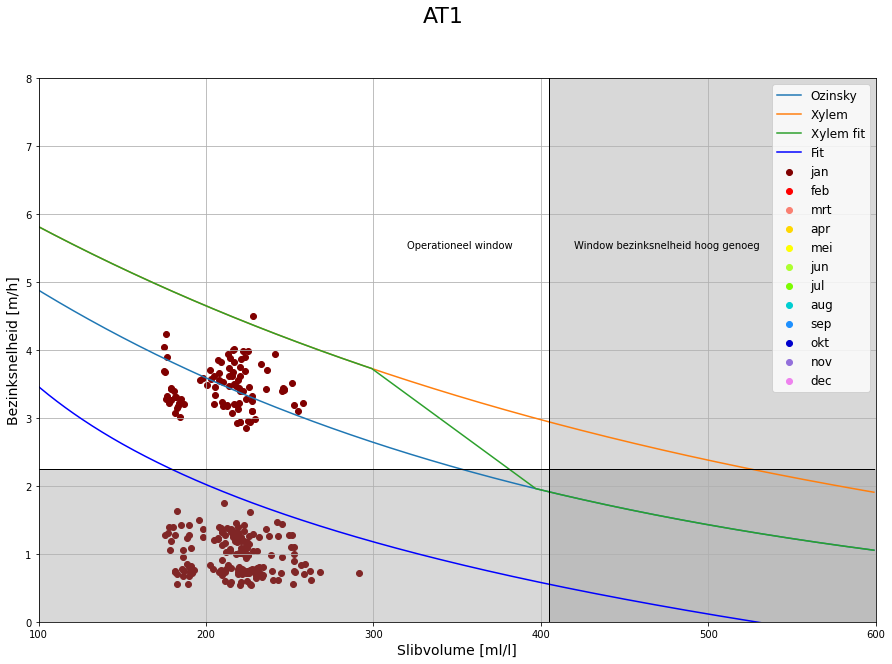

In [228]:
import matplotlib.pyplot as plt
colors = {1:'maroon', 2:'red', 3: 'salmon', 4:'gold', 5:'yellow', 6:'greenyellow', 7:'lawngreen', 8: 'darkturquoise', 9: 'dodgerblue', 10: 'mediumblue',11: 'mediumpurple', 12: 'violet'}
legend = {1:"jan",2:"feb",3:"mrt",4:"apr",5:"mei",6:"jun",7:"jul",8:"aug",9:"sep",10:"okt",11:"nov",12:"dec"}
df_results = df_results.assign(Month = df_results.index.month)

fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("AT1",fontsize=22)
ax.set_xlim(100,600)
ax.set_ylim(0,8)
ax.set_xlabel("Slibvolume [ml/l]", fontsize=14)
ax.set_ylabel("Bezinksnelheid [m/h]", fontsize=14)
for i in range(12):
    ax.scatter(x=df_results[df_results["Month"]==i+1]["Slibvolume"], y=df_results[df_results["Month"]==i+1]['Totale snelheid'], color=colors[i+1], label = legend[i+1])

ax.plot(t, ozinsky(t, 120), label="Ozinsky")
ax.plot(t, xylem(t, 120), label="Xylem")
ax.plot(t, xylem_fit(t, 120), label="Xylem fit")
ax.plot(t, p(np.log(t)), "b-", label = "Fit")
ax.plot(t, min_snelheid(t), color="black", linewidth=1)
plt.axvline(x=405, color="black", linewidth=1)

plt.axvspan(405,600, color="grey", alpha=0.3)
plt.axhspan(0,2.25, color="grey", alpha=0.3)
plt.text(320,5.5,"Operationeel window")
plt.text(420,5.5,"Window bezinksnelheid hoog genoeg")

plt.legend(fontsize="12")
plt.grid(which='major', axis='both')
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\Resultaten\AT1_Slibvolume_Bezinksnelheid")

In [221]:
at1 = "mediumpurple"
dwa = "red"
rwa = "dodgerblue"

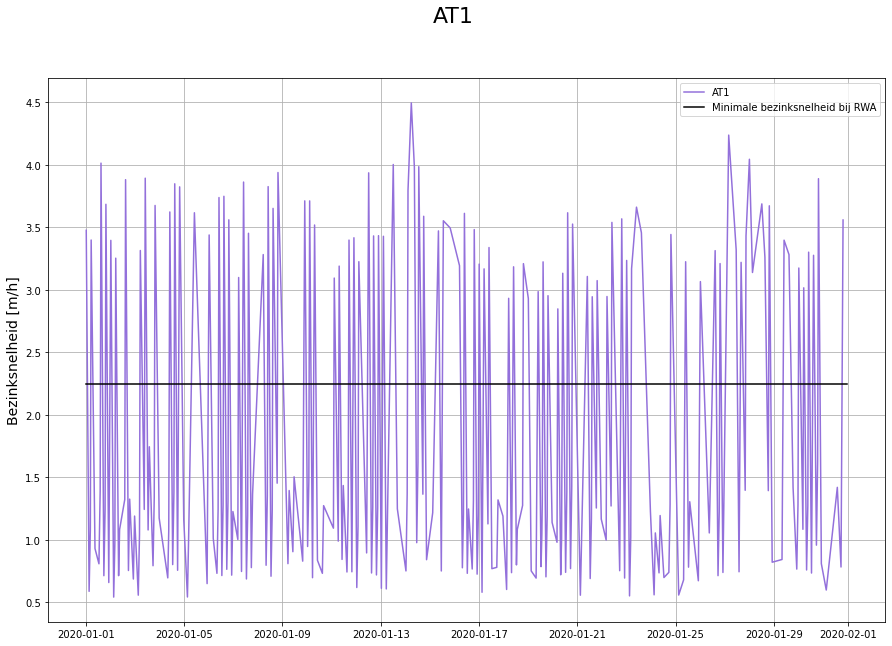

In [229]:
fig, ax = plt.subplots(figsize=(15,10))
fig.suptitle("AT1",fontsize=22)
ax.set_ylabel("Bezinksnelheid [m/h]", fontsize=14)
plt.grid(which='major', axis='both')
plt.plot(df_results.index, df_results["Totale snelheid"], color=at1, label="AT1")
ax.plot(df_results.index, min_snelheid(df_results.index), label="Minimale bezinksnelheid bij RWA", color="black")
plt.legend()
plt.savefig(r"P:\1263819\Biologische opstart Weesp\Berend\Plan van aanpak onderzoek\WsRL\WsRL 7 dec 2020\Resultaten\AT1_Bezinksnelheid")